### 이미지 raw data 파일에서 데이터 추출

In [39]:
## [1] 파일 입출력 방식
## with open() as ~

file_path = '../data/MNIST/t10k-images.idx3-ubyte'  # .gz 파일 읽으면 내용이 다르게 읽힌다.

In [40]:
# 파일 읽을 때 고려사항 => mode = br : 바이트 읽기 모드
with open(file_path, mode='br') as f:
    all_data = f.read()

In [41]:
print(type(all_data))       # <class 'bytes'>

<class 'bytes'>


In [42]:
len(all_data)

7840016

In [43]:
print(all_data[:100])

b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00"


In [44]:
with open(file_path, mode='br') as f:
    magic_code = f.read(4)  # 4바이트 읽기
    print(magic_code)
    
    data_length = f.read(4)
    print(data_length)      # bytes
    
    row = f.read(4)
    print(row)              # bytes
    
    col = f.read(4)
    print(col)              # bytes

b'\x00\x00\x08\x03'
b"\x00\x00'\x10"
b'\x00\x00\x00\x1c'
b'\x00\x00\x00\x1c'


In [45]:
# 바이트 => 알아볼 수 있는 문자로
row.hex()

'0000001c'

In [48]:
hex(10)     # '0x'가 붙여서 주므로, 문자열 형태

'0xa'

[2] 파이썬의 byte 데이터 변환 모듈 struct 활용

In [107]:
### 데이터 추출 및 저장 관련 변수
# 학습용 : train.csv
# 테스트용 : test.csv
# 위치 : ../data/text/

data_dir = '../data/text/'
train_file = data_dir + 'mnist_train.csv'
test_file = data_dir + 'mnist_test.csv'

In [57]:
### 사용자 정의 함수
### 기능     : raw data 파일을 읽어서 csv 파일로 저장
### 함수명   : to_csv
### 매개변수 : 파일이름, 데이터수
### 반환값   : 파일 생성 여부 True/False

In [96]:
import os, struct 

# CSV 변환 기능 함수
def to_csv(filenames: list, maxdata):
    DEBUG = False    # 디버깅 출력 제어 플래그 변수
    
    # (1) CSV 저장할 데이터 준비
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open(filenames[0], 'rb')
    img_f = open(filenames[1], 'rb')
    
    # CSV 파일 생성
    csv_f = open(filenames[2], 'w', encoding='utf-8')
    
    # 헤더 정보 읽기
    mag, lbl_count = struct.unpack('>II', lbl_f.read(8))    # 매직 코드 + 레이블 개수
    mag, img_count = struct.unpack('>II', img_f.read(8))    # 매직 코드 + 이미지 개수
    rows, cols = struct.unpack('>II', img_f.read(8))        # 행, 열 개수
    pixels = rows * cols
    
    if DEBUG:
        print('lbl_count {}, img_count {}'.format(lbl_count, img_count))
        print('rows {}, cols {}'.format(rows, cols))
        
    # (2) 이미지 데이터를 읽고 csv로 저장
    for idx in range(lbl_count):
        if idx > maxdata: break
        
        # 숫자이이미 데이터가 의미하는 숫자값 읽기
        # 튜플타입 리던 -> 1개 데이터 (value,)
        label = struct.unpack('B', lbl_f.read(1))[0]
        if DEBUG: print('label => {}'.format(label))
    
        # 이미지 데이터 읽기
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))  # 문자열로 변환
        if DEBUG: print('sdata => {}'.format(sdata))
        
        # csv 파일에 쓰기 => 라벨, 데이터, 데이터, ....., 데784
        csv_f.write(str(label) + ',')           # 숫자 라벨 쓰기
        csv_f.write(','.join(sdata) + '\n')     # 리스트 이미지 데이터 -> 문자열 변환 쓰기
        
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
    # 생성된 파일 존재 여부 확인 후 반환
    return os.path.exists(filenames[2])

In [166]:
path1 = '../data/MNIST/train-labels.idx1-ubyte'
path2 = '../data/MNIST/train-images.idx3-ubyte'
# 학습용 데이터 저장
path3 = '../data/text/mnist_train.csv'
to_csv([path1, path2, path3], 10000)
# 테스트 데이터 저장
path4 = '../data/text/mnist_test.csv'
to_csv([path1, path2, path4], 1000)

True

이미지 데이터 로딩 => csv > DataFrame 또는 NumPy

In [167]:
import pandas as pd
import numpy as np

In [168]:
trainDF = pd.read_csv(train_file, header=None)
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [169]:
testDF = pd.read_csv(test_file, header=None)
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 6.0 MB


In [170]:
trainDF.head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
# 이미지 데이터와 라벨 분리
labels = trainDF[0]                         # 답 저장
img_data = trainDF.iloc[:, 1:]              # 이미지 저장
labels.shape, img_data.shape, labels[:3]

((10001,),
 (10001, 784),
 0    5
 1    0
 2    4
 Name: 0, dtype: int64)

데이터 시각화

In [172]:
import matplotlib.pyplot as plt

In [173]:
# 1D 이미지 데이터 => 2D 이미지 데이터로 변환
raw_img = img_data.iloc[0].values   # ndarray (1D)

type(raw_img), raw_img.shape, raw_img.ndim

(numpy.ndarray, (784,), 1)

In [174]:
raw_img = raw_img.reshape(28, 28)   # ndarray (2D)   

type(raw_img), raw_img.shape, raw_img.ndim

(numpy.ndarray, (28, 28), 2)

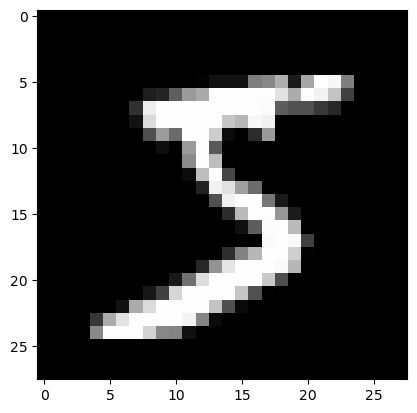

In [175]:
# 시각화
plt.imshow(raw_img, cmap='gray')
plt.show()

In [176]:
labels[0]   # 답 출력

5